# <span style="font-family:Bebas Neue; font-size:1em;">Proyecto Semestral - IEE2103</span>

A partir del desarrollo en Wolfram Mathematica, se obtuvo que $s(x) = \ \uparrow \uparrow _{c} \ast \ a \cdot \wedge \left( \frac{1 - \frac{L}{2}}{\frac{L}{2}} \right)$ 

De esta manera, $s(x, t) = \ \frac{a}{2} \cdot \left( \wedge \left( \frac{1 - \frac{L}{2} - ct}{\frac{L}{2}} \right) + \wedge \left( \frac{1 - \frac{L}{2} + ct}{\frac{L}{2}} \right) \right)$ 

In [173]:
# Librerías
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from random import random
import sounddevice as sd
from IPython.display import clear_output

In [6]:
def triangulo(x):
    return 2 * abs((x / 2) % 2 - 1) - 1

def s(
    x,  
    t,
    a = 1,                      # amplitud
    L = 0.7,                    # largo de cuerda estándar
    c = 1.8012 * (10 ** -4),    # velocidad
    u = 3.09 * (10 ** -4),      # densidad de la cuerda
    T = 56.4                    # tensión
    ):
    
    return (a / 2) * (triangulo((x - L / 2 - c * t) / (L / 2)) + triangulo((x - L / 2 + c * t) / (L / 2)))

In [3]:
'''
fig, ax = plt.subplots()

L = 0.648
t = np.arange(0.0, 5, 0.001)
s = s(L, t)
l = plt.plot(t, s)

ax = plt.axis([0, L, -1, 1])

redDot, = plt.plot([L / 2], [s(L / 2, 0)], 'ro')

def animate(i):
    redDot.set_data(i, s(L, i))
    return redDot,

myAnimation = FuncAnimation(fig, animate, frames=np.arange(0.0, 5, 0.1), \
                                      interval=10, blit=True, repeat=True)

plt.show()
'''

'''
L = 0.648                       #largo de una cuerda estandar 

#--------------------------------------------------------------------------------------------------------------------------------


list_x = np.linspace(0, 1000)
fig, ax = plt.subplots()
ax.set_ylim(-1, 1)
def animate(i):
    y = list(map(lambda x:s(x, i, L = 0.648), list_x))
    ax.plot(list_x,y,color = "green")

ani = FuncAnimation(fig, animate, frames = np.arange(0.0, 5.0, 0.2), interval = 10, repeat = True)
plt.show()
'''

'\nL = 0.648                       #largo de una cuerda estandar \n\n#--------------------------------------------------------------------------------------------------------------------------------\n\n\nlist_x = np.linspace(0, 1000)\nfig, ax = plt.subplots()\nax.set_ylim(-1, 1)\ndef animate(i):\n    y = list(map(lambda x:s(x, i, L = 0.648), list_x))\n    ax.plot(list_x,y,color = "green")\n\nani = FuncAnimation(fig, animate, frames = np.arange(0.0, 5.0, 0.2), interval = 10, repeat = True)\nplt.show()\n'

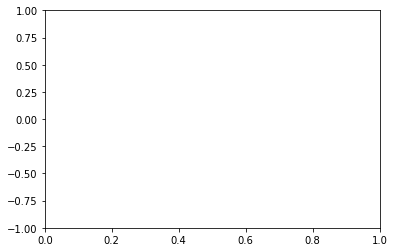

In [108]:
def animate(i):
    ax.clear()
    y = list(map(lambda x:s(x, i*100, L = 0.648), list_x))
    ax.plot(list_x, y)
    ax.set_ylim(-1, 1)
    ax.plot(list_x,y,color = "green")
                       #largo de una cuerda estandar 

#--------------------------------------------------------------------------------------------------------------------------------

L = 0.648
list_x = np.linspace(0, L, 1000)
fig, ax = plt.subplots(1,1)
ax.set_ylim(-1,1)
ani = FuncAnimation(fig, animate, frames = 1000, interval = 60)
plt.show()     

In [28]:
def s(
    x,  
    t,
    a = 1,                      # amplitud
    L = 0.648,                  # largo de cuerda estándar    
    u = 3.09 * (10 ** -4),      # densidad de la cuerda
    T = 56.4                    # tensión
    ):
    
    c = math.sqrt(T / u)
    
    return (a / 2) * (triangulo((x - L / 2 - c * t) / (L / 2)) + triangulo((x - L / 2 + c * t) / (L / 2)))

In [155]:
def envolvente(x, t, fm):
    
    envelope = []
    num = 0
    aux = {
        0: 0,
        1: 0.064,
        2: 0.154,
        3: 0.604,
        4: 1
        }

    for i in x:
        
        num += (1 / (fm * t))

        if num < aux[1]:
            envelope.append((i / 0.08) * num)
        
        elif num < aux[2]:
            envelope.append(i * (1 - (1 / 0.185) * (num - 0.024)))
        
        elif num < aux[3]:
            envelope.append(0.3 * i)
        
        elif num < aux[4]:
            envelope.append(i * (-0.758) * (num - 1))
        
        else:
            envelope.append(0)
    
    return envelope

In [120]:
fm = 44100
duracion = 5
muestra = np.linspace(0, duracion, duracion * fm)
amplitud = 1
sonido = s(0.35, muestra, a = amplitud)

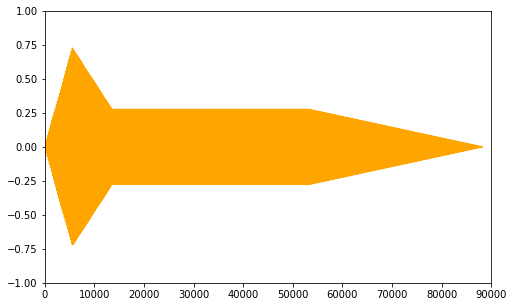

In [156]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.set_xlim(0, 45000 * duracion)
ax.set_ylim(-1, 1)
plt.plot(envolvente(sonido, duracion, fm), color = "orange")
sd.play(envolvente(sonido, duracion, fm), fm)

In [165]:
class Cuerda:
    fm = 44100
    def __init__(self, nombre: str, tension: float, densidad: float, amplitud = 1, largo = 0.648):
        self.nombre = nombre
        self.tension = tension
        self.densidad = densidad
        self.amplitud = amplitud
        self.largo = largo
    
    @property
    def muestra(self):
        return np.linspace(0, 5, 2 * Cuerda.fm)

    def crear_sonido(self):
        muestra = self.muestra
        return s(0.35, muestra, a = self.amplitud, L = self.largo, u = self.densidad, T = self.tension)
    
    def __repr__(self):
        return f'Cuerda: {self.nombre}\n' \
            + f'Tensión: {self.tension}\n' \
            + f'Densidad: {self.densidad}\n' \
            + f'Amplitud: {self.amplitud}\n' \
            + f'Largo: {self.largo}\n'

In [166]:
cuerdas = (
    ((0, 0), Cuerda('HI E', 56.40, 3.09 * (10 ** -4))),
    ((0, 1), Cuerda('B', 48.86, 4.77 * (10 ** -4))),
    ((1, 0), Cuerda('G', 66.61, 1.03 * (10 ** -3))),
    ((1, 1), Cuerda('D', 58.55, 1.62 * (10 ** -3))),
    ((2, 0), Cuerda('A', 71.11, 3.50 * (10 ** -3))),
    ((2, 1), Cuerda('LOW E', 65.90, 5.78 * (10 ** -3))),
)

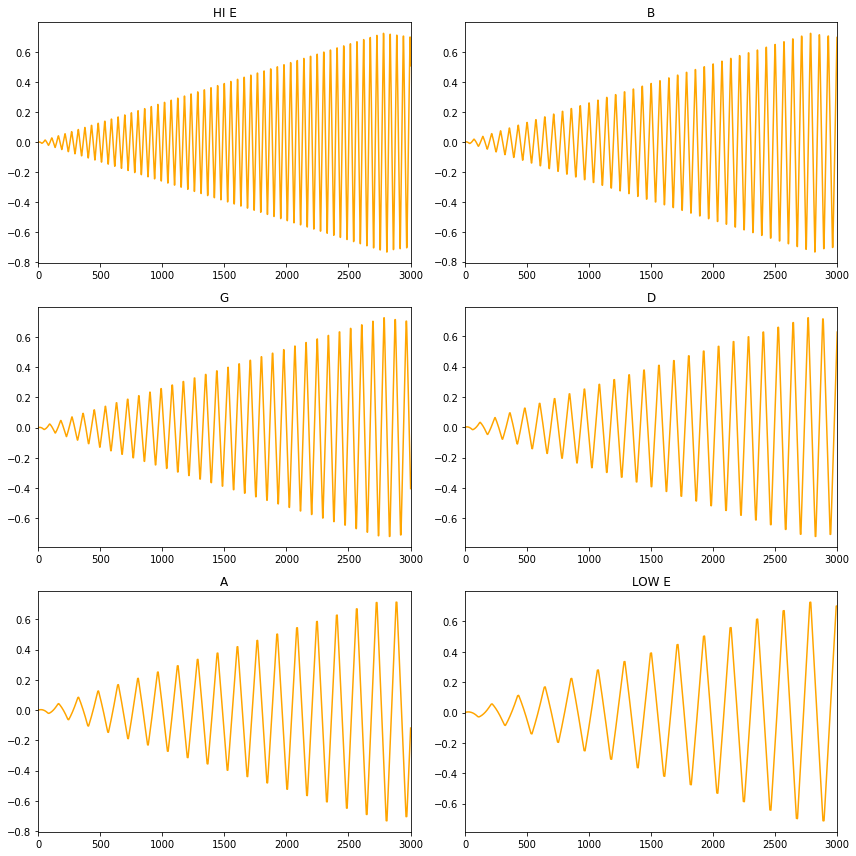

In [186]:
fig, ax = plt.subplots(3,2,figsize=(12,12))

rasguido = 0
for pos, cuerda in cuerdas:

    duracion = 1
    sonido = cuerda.crear_sonido()
    rasguido += sonido

    ax[pos[0], pos[1]].plot(envolvente(sonido, duracion, fm), color = 'orange')
    ax[pos[0], pos[1]].set_title(cuerda.nombre) # Escojemos un título para el gráfico
    ax[pos[0], pos[1]].set_xlim(0, 3000)

    print(f'Actualmente suena la cuerda {cuerda.nombre}')

    sd.play(envolvente(sonido, duracion, fm), fm)
    sd.wait()

    clear_output(wait=True)

print(f'Actualmente suena el rasguido')

sd.play(envolvente(rasguido, duracion, fm), fm)
sd.wait()

clear_output(wait=True)

#plt.plot(envolvente(rasguido, duracion, fm), color = 'orange')

plt.tight_layout()
plt.show()